# Create a WordCloud with a Hat Mask

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [2]:
# open the file and read it into a variable text
text = open("mario.txt", "r").read()

In [3]:
# inspect 
# text

In [4]:
words = {'1':'DataScientist ', '2':'Motorcyclist ', 
         '3':'Fitness ', '4':'LA ', '5':'USC ', 
         '6':'SelfMade ', '7':'Business ', '8':'Baseball ', 
         '9':'Python ', '10':'Pandas ', '11':'Machine Learning', 
         '12':'SQL ', '13':'Analyst ', '14':'git ', '15':'Optimization ', 
         '16':'Cubs ', '17':'AI ', '18':'Classification ', 
         '19':'Regression ', '20':'Matplotlib ', '21':'Numpy ', 
         '22':'Modeling ', '23':'Predictions ', '24':'GeneralAssembly ', 
         '25':'Engineer ', '26':'Entrepreneur '}

In [5]:
# create dataframe of words
df = pd.DataFrame.from_dict(words, orient='index', columns = ['words'])
df

,words
1,DataScientist
2,Motorcyclist
3,Fitness
4,LA
5,USC
6,SelfMade
7,Business
8,Baseball
9,Python
10,Pandas


## WordCloud

In [6]:
# instantiate a word cloud object
hat_wc = WordCloud( 
    max_font_size=100,
    background_color='white',
    collocations=False,
    colormap='bone'
)

# generate the word cloud
hat_wc.generate(text)

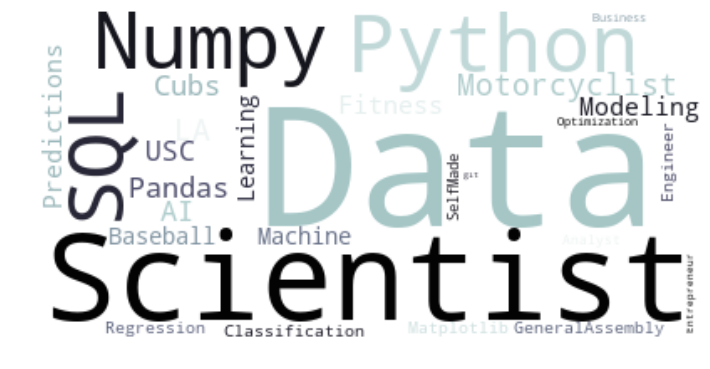

In [7]:
# display the word cloud
plt.figure(figsize=(12,12))
plt.imshow(hat_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Hat Mask

In [8]:
from PIL import Image # converting images into arrays

In [9]:
# open cap image for mask
cap_mask = np.array(Image.open('cap_PNG5685.png'))

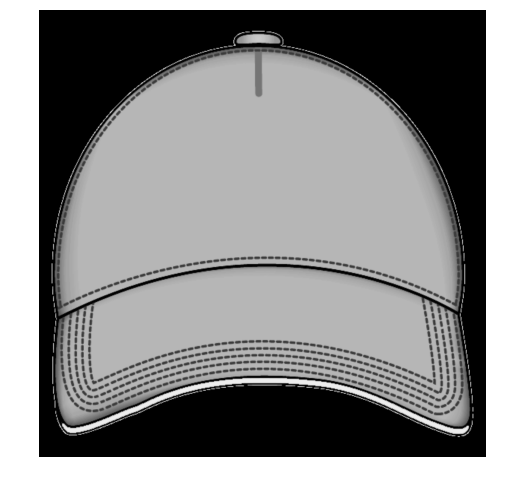

In [10]:
# display mask
fig = plt.figure()
fig.set_figwidth(8) # set width
fig.set_figheight(10) # set height

plt.imshow(cap_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
# inspect file
cap_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [12]:
# function to transform 0 to 255 so that the mask works properly
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [13]:
# Transform the mask into a new one that will work with the function:
transformed_cap_mask = np.ndarray((cap_mask.shape[0],cap_mask.shape[1]), np.int32)

for i in range(len(cap_mask)):
    transformed_cap_mask[i] = list(map(transform_format, cap_mask[i]))

In [14]:
# Check the expected result of the mask
transformed_cap_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [15]:
# instantiate a word cloud object with mask
hat_wc = WordCloud( 
    max_font_size=200,
    background_color='white',
    collocations=False,
    colormap='bone',
    mask=transformed_cap_mask,
    contour_width=3, contour_color='blue'
)

# generate the word cloud
hat_wc.generate(text)

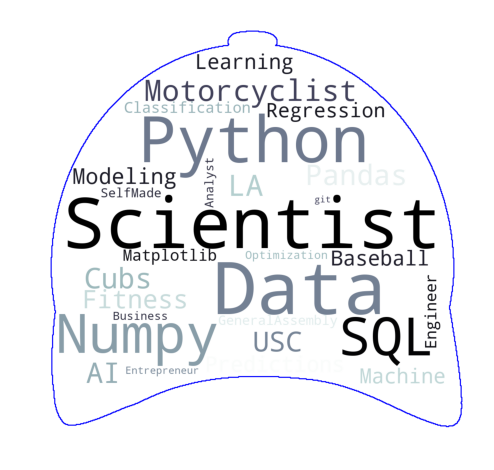

In [16]:
# display the word cloud with mask
plt.figure(figsize=(8,8))
plt.imshow(hat_wc, interpolation='kaiser')
plt.axis('off')
plt.show()

In [17]:
# save image as a PNG file
# mario_wc.to_file("capwordcloud.png")